In [10]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
#import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
data =pd.read_csv('/content/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [12]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
data.shape

(500, 9)

In [14]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

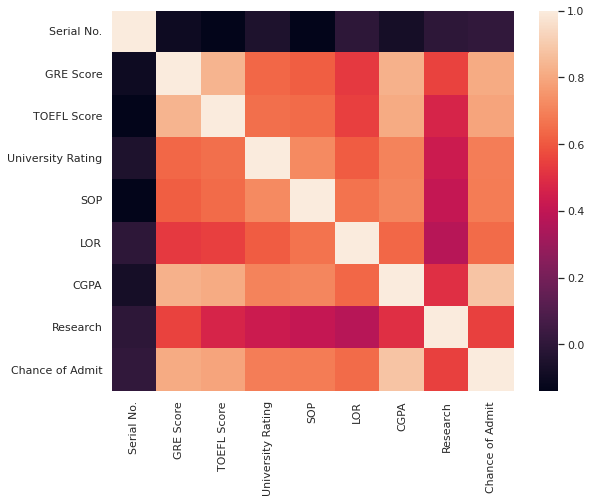

In [15]:
plt.figure(figsize = (9,7))
sns.heatmap(data.corr())

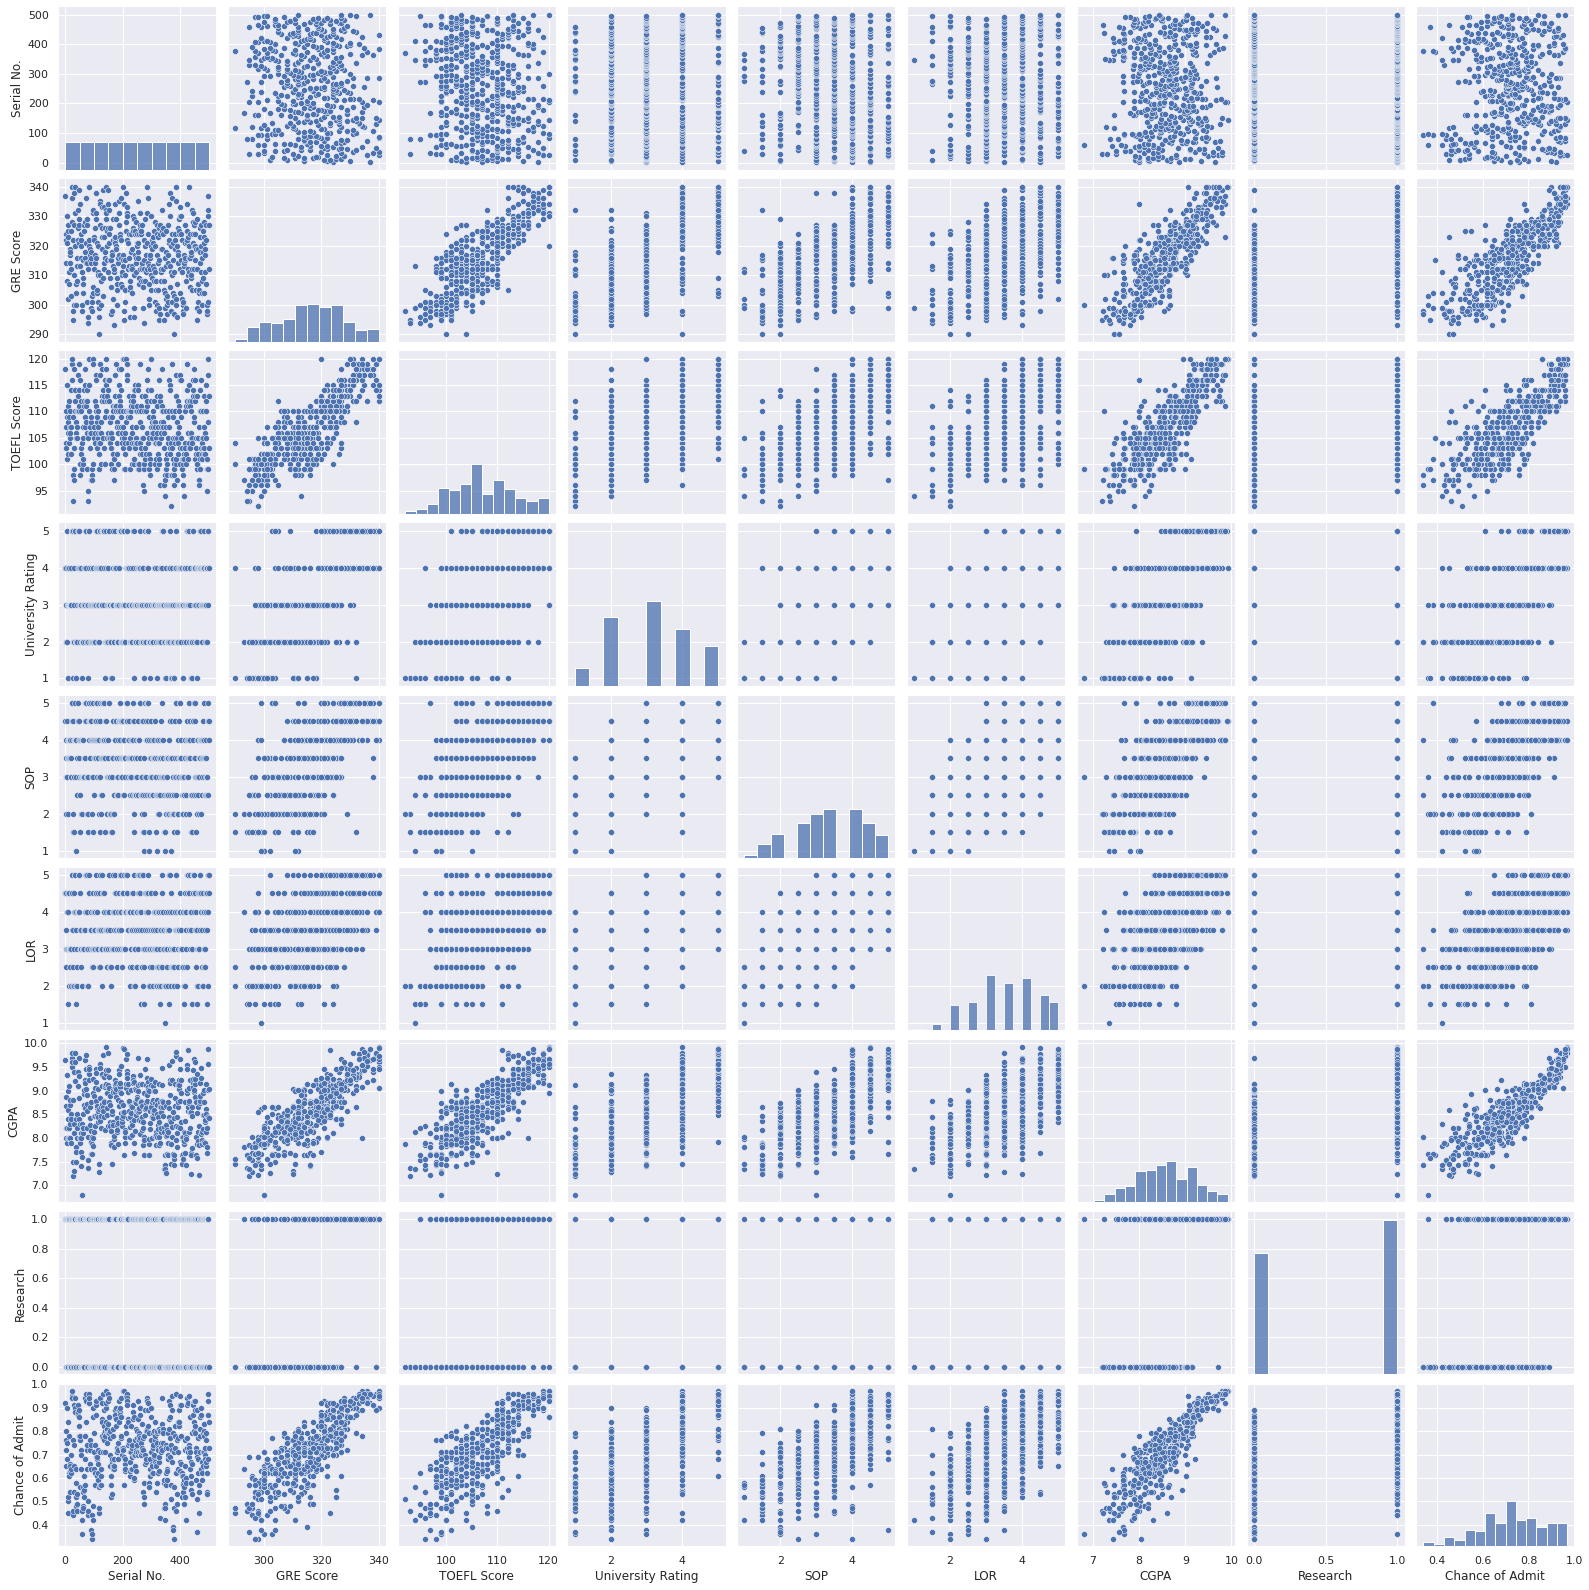

In [16]:
sns.pairplot(data)

**Filling Missing Values** 

In [17]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [18]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [19]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [20]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


### **EDA**

Let's visualize the data and analyze the relationship between independent and dependent variables:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

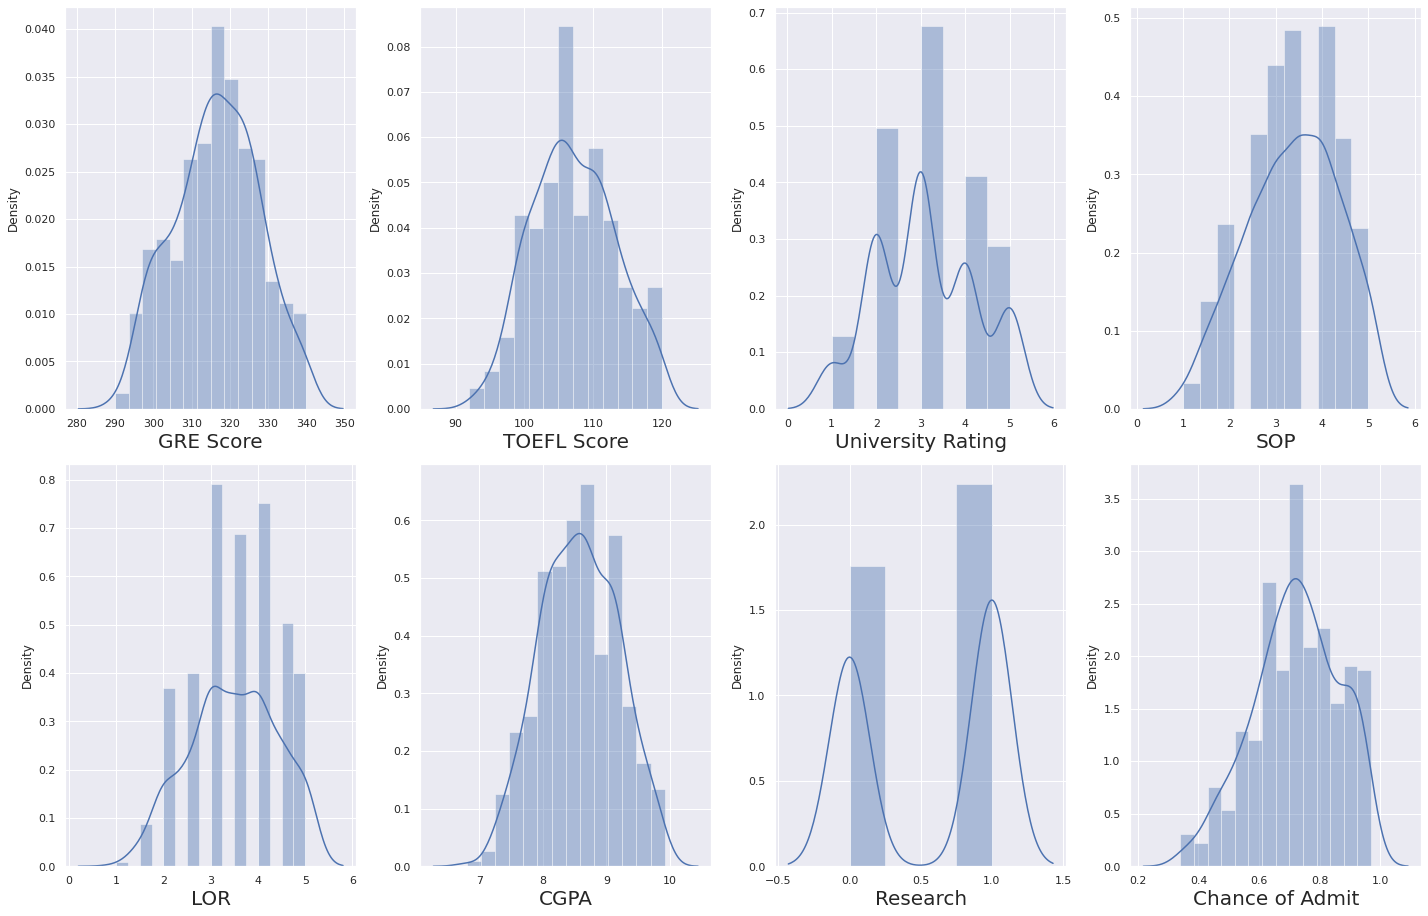

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [22]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

In [23]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [24]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

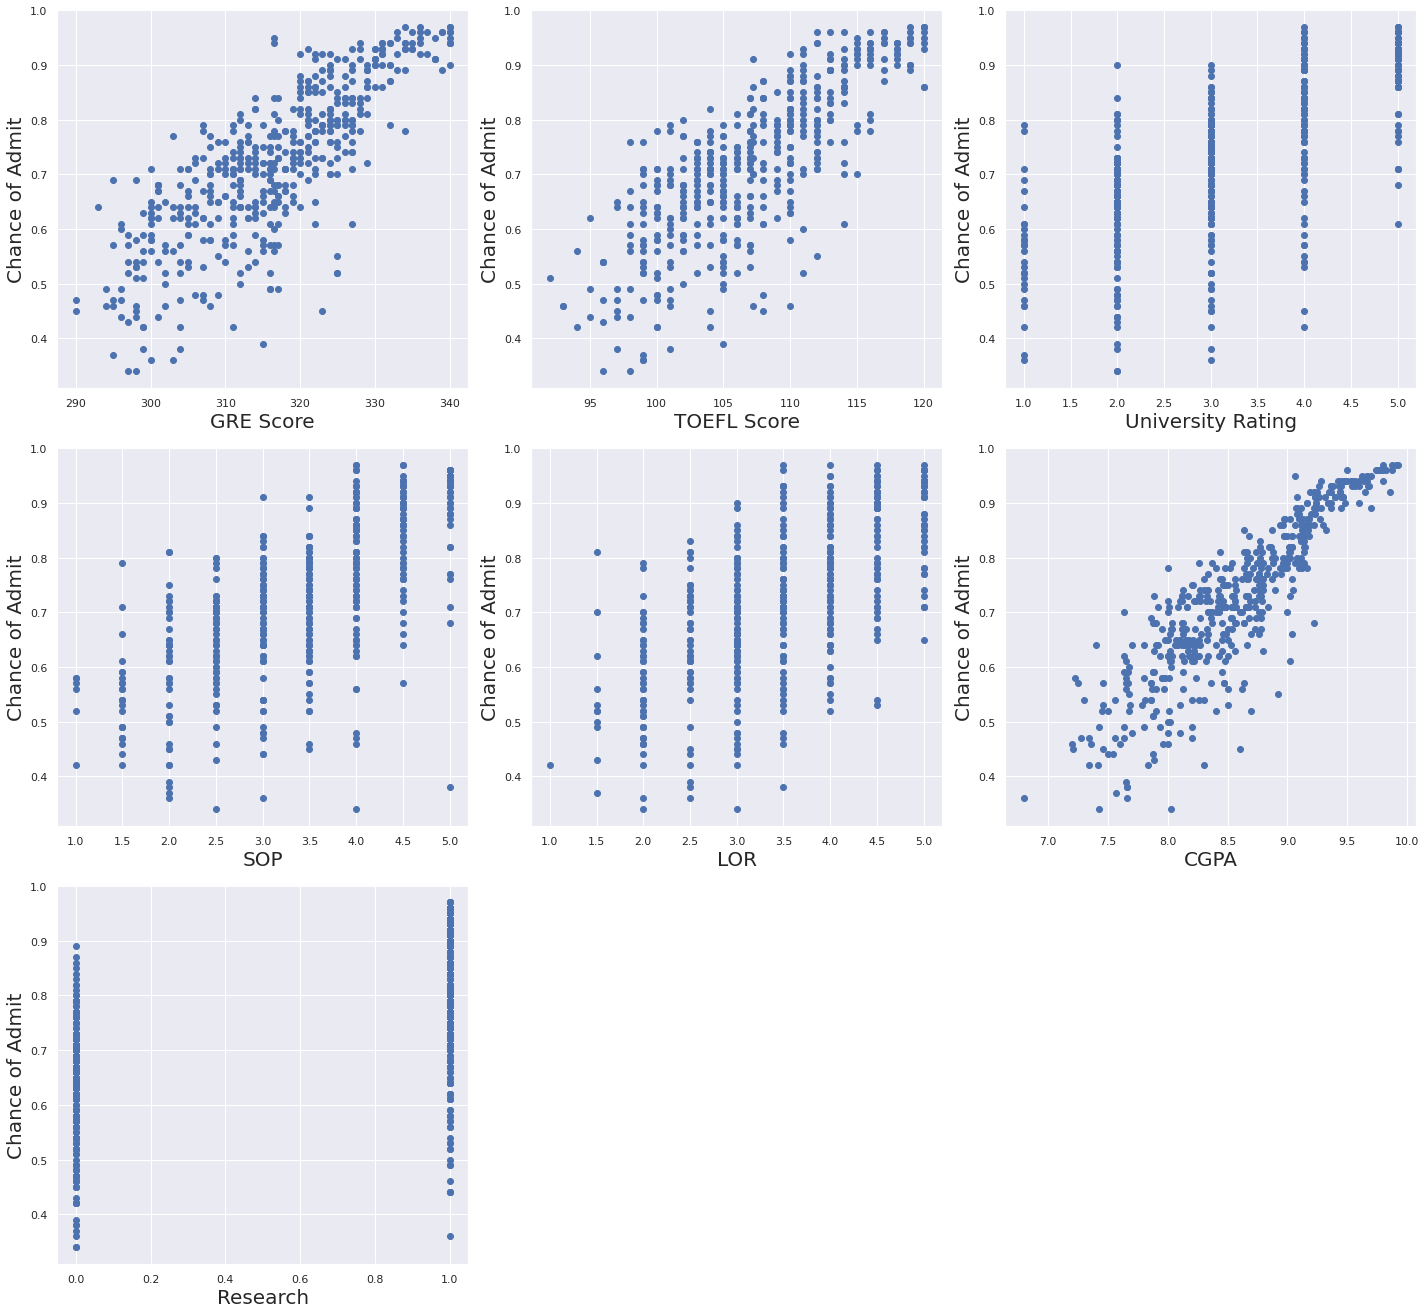

In [25]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

### **Feature Scaling**

In [26]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [28]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [30]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [31]:
print("Shape of X train: ",x_train.shape)
print("Shape of X test: ",x_test.shape)
print("Shape of y train: ",y_train.shape)
print("Shape of y test: ",y_test.shape)

Shape of X train:  (375, 7)
Shape of X test:  (125, 7)
Shape of y train:  (375,)
Shape of y test:  (125,)


# **Implementation of Machine Learning Start**

In [32]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [33]:
# saving the model to the local file system
#filename = 'finalized_model.pickle'
#pickle.dump(regression, open(filename, 'wb'))

In [34]:
# prediction using the saved model
#loaded_model = pickle.load(open(filename, 'rb'))
#a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
#a

In [35]:
regression.score(x_train,y_train)

0.8415250484247909

In [36]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [37]:
adj_r2(x_train,y_train)

0.8385023654247188

Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [38]:
regression.score(x_test,y_test)

0.7534898831471066

In [39]:
adj_r2(x_test,y_test)

0.7387414146174464

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [40]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [41]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [42]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [43]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [44]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

RidgeCV(alphas=array([4.94452908, 4.33246866, 3.51365344, 0.94339251, 3.77315574,
       6.22016972, 6.42756878, 1.35088526, 4.59411773, 4.9076442 ,
       3.92389182, 1.96336958, 4.55938123, 2.21061077, 5.69413171,
       2.38173795, 2.43026876, 4.38069093, 3.4418762 , 9.17350978,
       1.33001791, 6.16108614, 1.07574227, 6.13359002, 8.60072275,
       7.46239465, 3.89215261, 2.09961074, 9.76773478, 9.25921956,
       4.21660982, 6.55240278, 3.4774941 , 2.13215531, 4.83492662,
       3.46998568, 2.97103718, 8.52606753, 3.0198072 , 7.74623779,
       3.62374277, 4.77685921, 0.42890659, 1.24416475, 1.38624895,
       0.60032527, 0.2285709 , 3.4461681 , 7.59330317, 1.95357853]),
        cv=10, normalize=True)

In [45]:
ridgecv.alpha_

0.2285708990440416

In [46]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.2285708990440416)

In [47]:
ridge_model.score(x_test, y_test)

0.7536014210536472

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [48]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [49]:
elasticCV.alpha_

0.0011069728449315508

In [50]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [51]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [52]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

# **Implementation of ANN Start**





In [53]:
# Importing the Keras libraries and packages
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
     

In [54]:
# Initialize the ANN

model = Sequential() 

In [55]:
data.shape

(500, 8)

In [56]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [57]:
# Adding the Input Layer
model.add(Dense(units = 7,activation="relu"))

In [58]:
# Adding the First Hidden Layer
model.add(Dense(units = 7,activation="relu"))
model.add(Dropout(0.2))

In [59]:

# Adding the Second Hidden Layer
model.add(Dense(units = 6,activation="relu"))
model.add(Dropout(0.3))

In [60]:

# Adding the Output Layer
model.add(Dense(units = 1,activation="linear"))

In [61]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [68]:
# Now train the Model
history = model.fit(x_train,y_train,epochs = 1000,validation_split = 0.2)

Epoch 1/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0213 - val_loss: 0.0111
Epoch 2/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.0212 - val_loss: 0.0110
Epoch 3/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0109
Epoch 4/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.0193 - val_loss: 0.0113
Epoch 5/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.0214 - val_loss: 0.0113
Epoch 6/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.0204 - val_loss: 0.0113
Epoch 7/1000
10/10 [==============================] - 0s 15ms/step - loss: 0.0208 - val_loss: 0.0111
Epoch 8/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0158 - val_loss: 0.0104
Epoch 9/1000
10/10 [==============================] - 0s 18ms/step - loss: 0.0213 - val_loss: 0.0098
Epoch 10/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.0181 - val_loss

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 167
Trainable params: 167
Non-trainable 

In [70]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'val_loss'])


#### **Prediction of Model**

In [71]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [72]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.2253235240813738

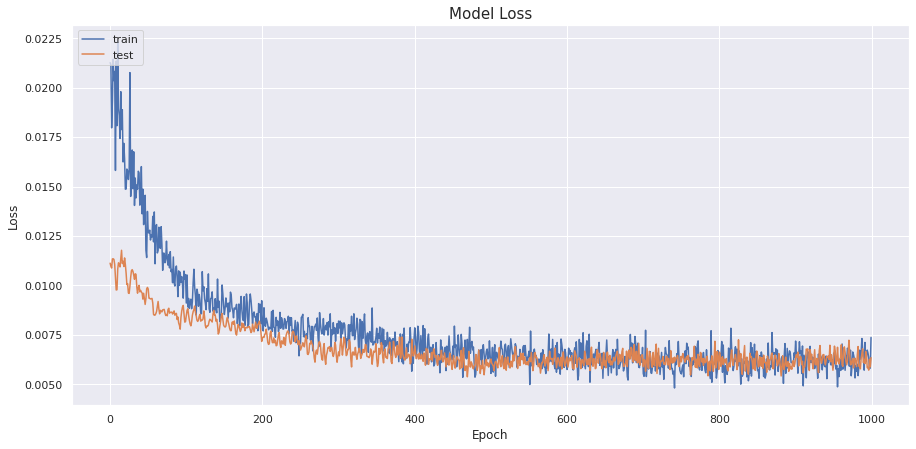

In [73]:

# summarize history for loss
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=15)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()